In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ACTOR = "genscen_Gorssel_50000_12-06-2021-03-06-15.tar.gz"

In [3]:
experiments, outcomes = load_results("data/generated/" + ACTOR)
dike_model, planning_steps = get_model_for_problem_formulation("Gorssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]
x = experiments[uncertainties]
outcomes_df = pd.DataFrame(outcomes)

In [4]:
outcomes_df.columns.values.tolist()

['Difference in Expected Annual Damage Gorssel-Deventer',
 'Difference in Expected Number of Deaths Gorssel-Deventer',
 'Gorssel Expected Annual Damage',
 'Gorssel Expected Number of Deaths',
 'Gorssel Budget Overrun ',
 'Gorssel Total Costs ']

In [6]:
DIFDAMAGE = outcomes_df.columns[0]
DIFDEATHS = outcomes_df.columns[1]
DAMAGE = outcomes_df.columns[2]
DEATHS = outcomes_df.columns[3]
BUDGET = outcomes_df.columns[4]
COSTS = outcomes_df.columns[5]

In [9]:
outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0]

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Budget Overrun,Gorssel Total Costs


Looks like there is always more damage in Deventer than in Gorssel if there are not any policies in place

In [10]:
len(outcomes_df.loc[outcomes_df[DIFDAMAGE] > 0])

0

In [11]:
outcomes_df.describe(percentiles=np.arange(0, 1, 0.1))

,Difference in Expected Annual Damage Gorssel-Deventer,Difference in Expected Number of Deaths Gorssel-Deventer,Gorssel Expected Annual Damage,Gorssel Expected Number of Deaths,Gorssel Budget Overrun,Gorssel Total Costs
count,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.0,50000.0
mean,-2195.842747,-1.820303e-06,4.394637e+07,0.021209,0.0,0.0
std,2558.744855,2.280280e-06,4.660492e+07,0.020512,0.0,0.0
min,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0,0.0
0%,-16316.748534,-1.057313e-05,0.000000e+00,0.000000,0.0,0.0
10%,-5852.691383,-5.174198e-06,2.804631e+06,0.001676,0.0,0.0
20%,-3362.048957,-3.213099e-06,6.498399e+06,0.004197,0.0,0.0
30%,-2033.402478,-1.871860e-06,8.958514e+06,0.004837,0.0,0.0
40%,-1514.690034,-1.173131e-06,1.394666e+07,0.008550,0.0,0.0
50%,-1213.798597,-7.219704e-07,1.998865e+07,0.010051,0.0,0.0


Obviously, without any policies inplace, there also aren't any costs for Gorssel.

In [125]:
# LEGACY
def conditional(y):
    '''
    Define the conditionals for each outcome
    '''
    # Difference in Expected Annual Damage Gorssel-Deventer
    # We do not accept any difference
    if y == DIFDAMAGE:
        return outcomes_df[y] > np.percentile(a=outcomes[DIFDAMAGE], q=90)
    # Expected Annual Damage Gorssel
    #
    elif y == DAMAGE:
        return outcomes_df[y] > np.percentile(a=outcomes[DAMAGE], q=90)
    # Difference in Expected Number of Deaths Gorssel-Deventer
    # We do not accept any difference
    elif y == DIFDEATHS:
        return outcomes_df[y] > np.percentile(a=outcomes[DIFDEATHS], q=90)
    else:
        exit()

In [12]:
prim_algs = {}
for outcome in [DAMAGE, DEATHS]:
    #code block below performs a rotation of data
#     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
#     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
#     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, conditional(outcome))
#     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
#     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
#     x = rotated_x
    
    prim_algs[outcome] = prim.Prim(x,  outcomes_df[outcome] > np.percentile(a=outcomes[outcome], q=90), threshold=0.8)

In [15]:
boxes = {}
for key in [DAMAGE, DEATHS]:
    print(key)
    boxes[key] = prim_algs[key].find_box()

Gorssel Expected Annual Damage
Gorssel Expected Number of Deaths


Gorssel Expected Annual Damage


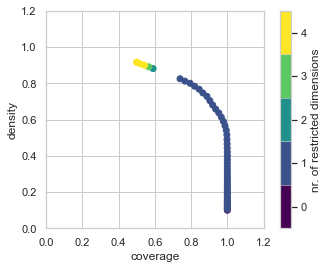

Gorssel Expected Number of Deaths


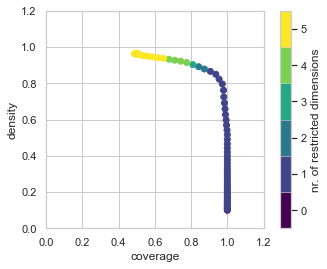

In [164]:
for key, box in boxes.items():
    print(key)
    box.show_tradeoff()
    plt.show()

# Trying around to find the right box

## Damage

In [165]:
box_id=45
BOX = DAMAGE

coverage      0.7944
density     0.800322
id                45
mass         0.09926
mean        0.800322
res_dim            1
Name: 45, dtype: object

             box 45                       
                min       max    qp values
A.4_pfail  0.000014  0.099266  [-1.0, 0.0]



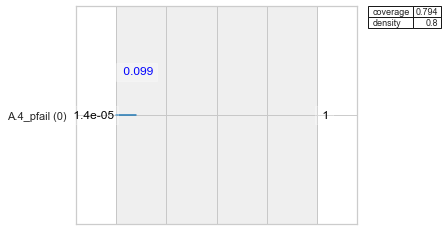

In [166]:
boxes[BOX].inspect(box_id)
boxes[BOX].inspect(box_id, style='graph')
plt.show()

In [167]:
boxes[BOX].select(box_id)
boxes[BOX].show_pairs_scatter()
plt.show()

KeyError: "None of [Index([('discount rate 0', 'discount rate 1', 'discount rate 2', 'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate', 'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail', 'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax', 'A.5_pfail', 'A.5_Brate', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2')], dtype='object')] are in the [columns]"

In [168]:
lims = boxes[BOX].box_lims[box_id]

In [169]:
limits = pd.DataFrame(data={"outcome": ["damage"], "min": [lims["A.4_pfail"][0]], "max" :  [lims["A.4_pfail"][1]]})

In [170]:
limits

,outcome,min,max
0,damage,0.000014,0.099266


## Deaths

In [171]:
box_id=42
BOX = DEATHS

coverage    0.954746
density     0.823347
id                42
mass         0.11582
mean        0.823347
res_dim            1
Name: 42, dtype: object

             box 42                       
                min       max    qp values
A.4_pfail  0.000014  0.115819  [-1.0, 0.0]



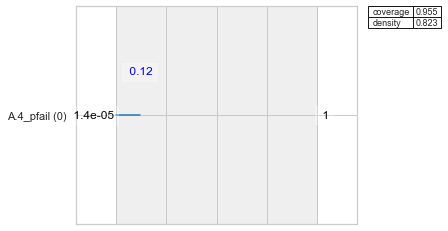

In [172]:
boxes[BOX].inspect(box_id)
boxes[BOX].inspect(box_id, style='graph')
plt.show()

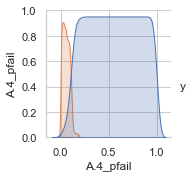

In [173]:
boxes[BOX].select(box_id)
boxes[BOX].show_pairs_scatter()
plt.show()

In [174]:
lims2 = boxes[BOX].box_lims[box_id]

In [175]:
limits = pd.concat([limits, pd.DataFrame(data={"outcome": ["deaths"], "min": [lims2["A.4_pfail"][0]], "max" :  [lims2["A.4_pfail"][1]]})], axis=0)

In [176]:
limits =limits.reset_index(drop=True)

In [229]:
limits

,outcome,min,max
0,damage,0.000014,0.099266
1,deaths,0.000014,0.115819


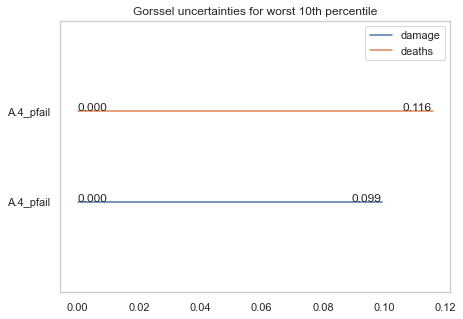

In [249]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111)
for index in limits.index:
    plt.plot([limits.loc[index]["min"],limits.loc[index]["max"]], [index,index])
    ax.annotate('{:.3f}'.format(limits.loc[index]["min"]),xy=(limits.loc[index]["min"],index +0.01))
    ax.annotate('{:.3f}'.format(limits.loc[index]["max"]),xy=(limits.loc[index]["max"]-0.01,index +0.01))
ax.grid(False)
ax.set_ylim([-1,2])
plt.legend(limits["outcome"].values)    
plt.yticks([0, 1], ["A.4_pfail"]*2)
plt.grid(False)
plt.title("Gorssel uncertainties for worst 10th percentile")
plt.show()